# Short Skimage Tutorial

This is a very short introduction to the [Scikit-image library](http://scikit-image.org/), including the main operations for image manipulation.

Note that images manipulated by Scikit-image are simply Numpy arrays. See [A crash course on NumPy for images](http://scikit-image.org/docs/dev/user_guide/numpy_images.html#numpy-indexing) for more information.

## Reading and writing images

Utilities to read and write images in various formats are available in the Module `io`.

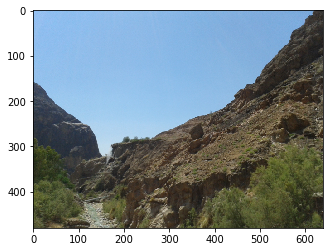

H:\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: images/black_image.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)


In [3]:
%matplotlib inline
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('images/jordan.jpeg')
plt.imshow(img) #Visualizing a figure with the image
plt.show()

img2 = img*0
io.imsave('images/black_image.bmp',img2)

Scikit-image provides a set of [standard test images](http://scikit-image.org/docs/dev/api/skimage.data.html?highlight=imread#skimage.data.imread) in the Module `data`: astronaut, binary_blobs, camera, checkerboard, chelsea, clock, coffee, coins, etc.

<class 'numpy.ndarray'>
(512, 512)
262144


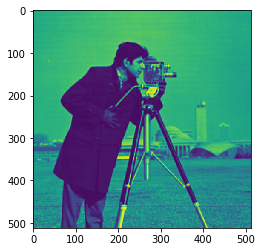

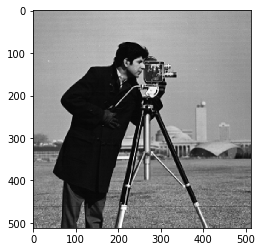

In [4]:
from skimage import data

camera = data.camera()
print(type(camera))
print(camera.shape)
print(camera.size)
plt.imshow(camera)
plt.show()
plt.imshow(camera, cmap='gray') # we can visualize the image 'camera' in gray scale
plt.show()

## Basic image manipulation

NumPy arrays representing images can be of different numerical types, such as integer or float. 

See [Image data types and what they mean](http://scikit-image.org/docs/dev/user_guide/data_types.html#data-types) for more information about these types and how scikit-image treats them.

In [5]:
from skimage import img_as_float
import numpy as np

image = np.arange(0, 50, 10, dtype=np.uint8) # arange function defines a vector from 0 to 50 in steps of 10.
print(image)

[ 0 10 20 30 40]


What is the difference between the two following operations?

In [6]:
print(image.astype(np.float))
print(img_as_float(image))

[ 0. 10. 20. 30. 40.]
[0.         0.03921569 0.07843137 0.11764706 0.15686275]


How to convert an image from `uint` to `float`? And from `float` to `ubyte`?

## Function `rescale` 

uint8 1 252 (303, 384)
float64 0.0147 0.9456 (152, 192)
float64 3.7582 241.1266 (152, 192)


H:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
H:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
H:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


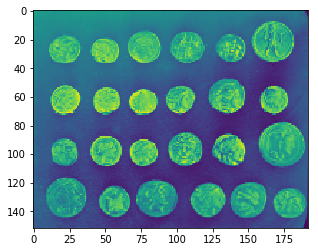

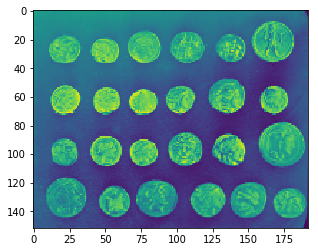

In [7]:
from skimage import data
from skimage.transform import rescale

image = data.coins()
print(image.dtype, image.min(), image.max(), image.shape)

rescaled = rescale(image, 0.5)
print(rescaled.dtype, np.round(rescaled.min(),4), np.round(rescaled.max(),4), rescaled.shape)

rescaled2 = rescale(image, 0.5, preserve_range=True)
print(rescaled2.dtype, np.round(rescaled2.min(),4), np.round(rescaled2.max(),4), rescaled2.shape)


plt.imshow(rescaled)
plt.show()
plt.imshow(rescaled2)
plt.show()



How to rescale intensity values?

255 0 (512, 512)


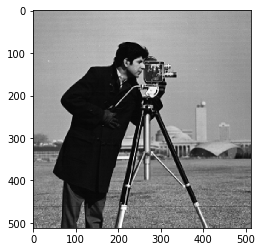

In [8]:
camera = data.camera()
print(camera.max(), camera.min(), camera.shape)
plt.imshow(camera, cmap='gray')
plt.show()

127.5 0.0 (512, 512)


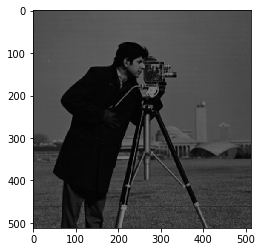

In [9]:
camera2 = camera/2
print(camera2.max(), camera2.min(), camera2.shape)
plt.imshow(camera2, cmap='gray', vmin=0, vmax=255)
plt.show()

227.5 100.0 (512, 512)


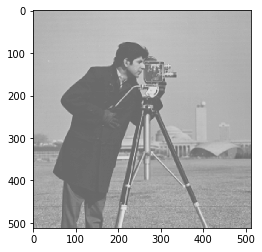

In [10]:
camera3 = camera2+100
print(camera3.max(), camera3.min(), camera3.shape)
plt.imshow(camera3, cmap='gray', vmin=0, vmax=255)
plt.show()

252 5 (64, 64)


H:\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


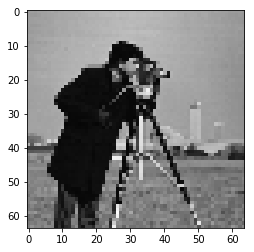

In [11]:
from skimage.transform import resize
from skimage import img_as_ubyte # img_as_ubyte Convert an image to 8-bit unsigned integer format

camera4 = img_as_ubyte(resize(camera,(64,64))) 
print(camera4.max(), camera4.min(), camera4.shape)
plt.imshow(camera4, cmap='gray', vmin=0, vmax=255)
plt.show()

More examples can be seen in the [Matplotlib Image tutorial](https://matplotlib.org/users/image_tutorial.html).

## Color (RGB) images

A color image is a NumPy array, with an additional trailing dimension for the channels. See [Scikit-image Color images](http://scikit-image.org/docs/dev/user_guide/numpy_images.html#color-images) for more information.

<class 'numpy.ndarray'>
(300, 451, 3)


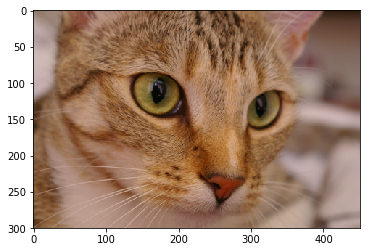

In [12]:
cat = data.chelsea()
print(type(cat))
print(cat.shape)
plt.imshow(cat)
plt.show()

Remember the way `numpy` allows us to index certain positions in a matrix. If we have a matrix `M`, we can access to a certain pixel `(i,j)` using the command `M[i,j]`, where `i` is the row and `j` the column. In order to index all the positions, we have to use the character `:`.

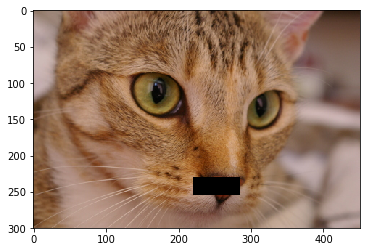

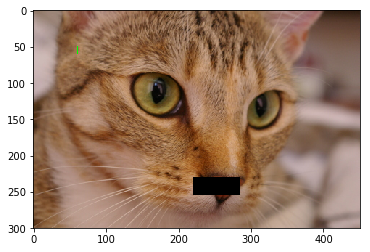

In [13]:
cat[230:255, 220:285] = 0 # set the pixels at rows from 230 to 255, columns from 220 to 285 to black
plt.imshow(cat)
plt.show()

cat[50:60, 61] = [0, 255, 0] # set the pixel at row 50, column 61 to green; remember [red, green, blue]
plt.imshow(cat)
plt.show()

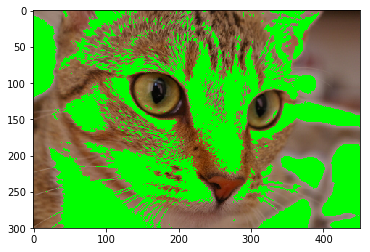

In [29]:
cat = data.chelsea()
reddish = cat[:, :, 0] > 160
cat[reddish] = [0, 255, 0]
plt.imshow(cat)
plt.show()

Note that it is always much faster to iterate on the rightmost indices. See the following example:

In [15]:
def in_order_multiply(arr, scalar):
     for plane in range(arr.shape[0]):
         arr[plane, :, :] *= scalar

def out_of_order_multiply(arr, scalar):
     for plane in range(arr.shape[2]):
         arr[:, :, plane] *= scalar

import time
im3d = np.random.rand(100, 1024, 1024)
t0 = time.time(); x = in_order_multiply(im3d, 5); t1 = time.time()

print("%.2f seconds" % (t1 - t0))  

im3d_t = np.transpose(im3d).copy() # place "planes" dimension at end
im3d_t.shape
s0 = time.time(); x = out_of_order_multiply(im3d, 5); s1 = time.time()

print("%.2f seconds" % (s1 - s0))  
print("Speedup: %.1fx" % ((s1 - s0) / (t1 - t0)))  

0.12 seconds
1.37 seconds
Speedup: 11.4x


Addendum to dimension names and orders in Scikit-image:

Image type: 2D color video       
Coordinates: (t, row, col, ch)

## Image adjustment: transforming image content


### Color manipulation

Most functions for manipulating color channels are found in the Module `color`. See [Scikit-image Color manipulation](http://scikit-image.org/docs/dev/user_guide/transforming_image_data.html) for more information.

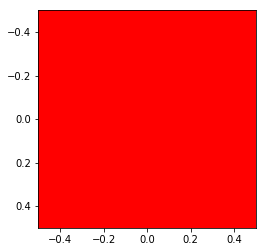

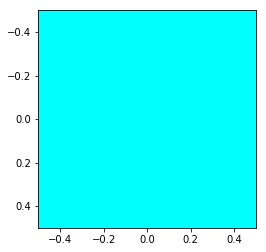

In [16]:
from skimage import color

# bright saturated red
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8)
plt.imshow(red_pixel_rgb)
plt.show()
color.rgb2hsv(red_pixel_rgb)
plt.imshow(color.rgb2hsv(red_pixel_rgb))
plt.show()

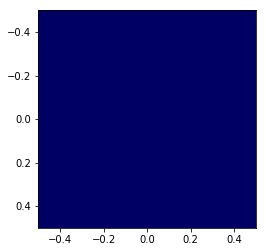

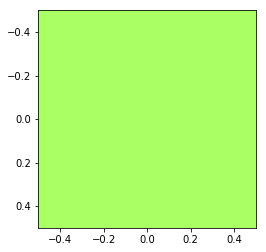

In [17]:
# darker saturated blue
dark_blue_pixel_rgb = np.array([[[0, 0, 100]]], dtype=np.uint8)
plt.imshow(dark_blue_pixel_rgb)
plt.show()
color.rgb2hsv(dark_blue_pixel_rgb)
plt.imshow(color.rgb2hsv(dark_blue_pixel_rgb))
plt.show()

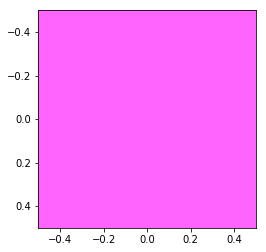

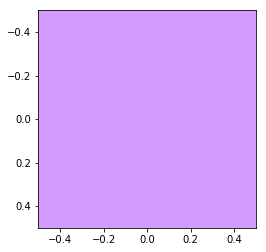

In [18]:
# less saturated pink
pink_pixel_rgb = np.array([[[255, 100, 255]]], dtype=np.uint8)
plt.imshow(pink_pixel_rgb)
plt.show()
color.rgb2hsv(pink_pixel_rgb)
plt.imshow(color.rgb2hsv(pink_pixel_rgb))
plt.show()

### Conversion from RGBA to RGB - Removing alpha channel through alpha blending

Converting an RGBA image to an RGB image by alpha blending it with a background is realized with `rgba2rgb()`

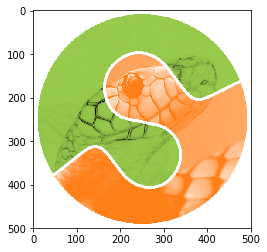

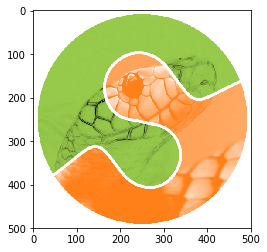

In [19]:
from skimage.color import rgba2rgb
# RGBA has 24 bits for RGB color, bit there is an additional 8 bit value for transparency.

img_rgba = data.logo()
img_rgb = rgba2rgb(img_rgba)
plt.imshow(img_rgba)
plt.show()
plt.imshow(img_rgb)
plt.show()

### Conversion between color and gray values

Converting an RGB image to a grayscale image is realized with `rgb2gray()`

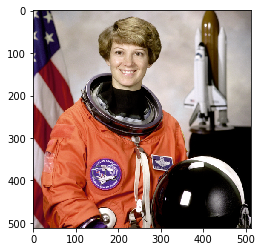

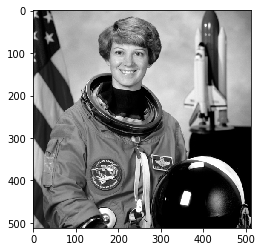

In [20]:
from skimage.color import rgb2gray

img = data.astronaut()
img_gray = rgb2gray(img)
plt.imshow(img)
plt.show()
plt.imshow(img_gray, cmap='gray')
plt.show()

Note that:

In [21]:
print (img_gray.dtype, img_gray.max())

float64 1.0


In [22]:
red_pixel = np.array([[[255, 0, 0]]], dtype=np.uint8)
print(rgb2gray(red_pixel))

green_pixel = np.array([[[0, 255, 0]]], dtype=np.uint8)
print (rgb2gray(green_pixel))


[[0.2125]]
[[0.7154]]


Given a gray image, how would it be looking if it is converted to RGB values? 

## Displaying  images and graphics

[Matplotlib](https://matplotlib.org/index.html) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. 

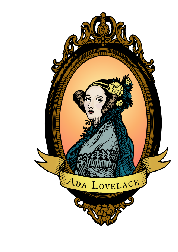

In [23]:
"""
Simple demo of the imshow function.
"""
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

#image_file = cbook.get_sample_data('./images/ada.png')
image = io.imread('images/ada.png')

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x- and y-axes
plt.show()

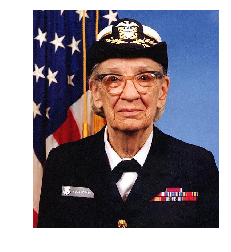

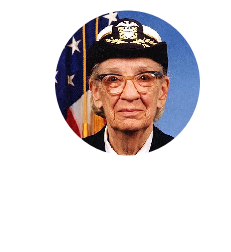

In [24]:
"""
Demo of image that's been clipped by a circular patch.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook

#image_file = cbook.get_sample_data('grace_hopper.png')
#image = plt.imread(image_file)
image = plt.imread('images/grace_hopper.png')

# Demo image
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x- and y-axes


# Adding the circular path
fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((260, 200), radius=200, transform=ax.transData)
im.set_clip_path(patch)
ax.axis('off')

plt.show()



See how to visualize multiple images:

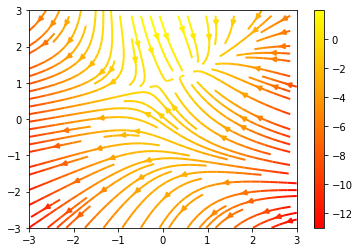

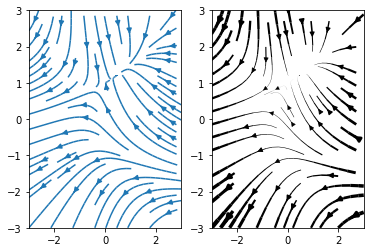

In [25]:
'''
Demo of the streamplot function.

A streamplot, or streamline plot, is used to display 2D vector fields. This
example shows a few features of the stream plot function:

    * Varying the color along a streamline.
    * Varying the density of streamlines.
    * Varying the line width along a stream line.
'''

import numpy as np
import matplotlib.pyplot as plt

Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn)
fig0.colorbar(strm.lines)

fig1, (ax1, ax2) = plt.subplots(ncols=2)
ax1.streamplot(X, Y, U, V, density=[0.5, 1])

lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)

plt.show()

Another [example](https://matplotlib.org/examples/pylab_examples/image_nonuniform.html) of how to display multiple images:

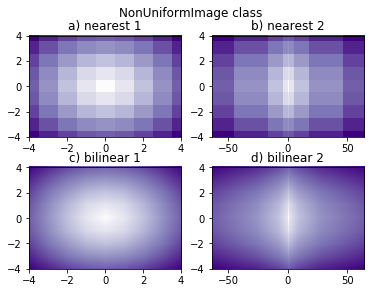

In [26]:
'''
This illustrates the NonUniformImage class.  It is not
available via an Axes method but it is easily added to an
Axes instance as shown here.
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
from matplotlib import cm

interp = 'nearest'

# Linear x array for cell centers:
x = np.linspace(-4, 4, 9)

# Highly nonlinear x array:
x2 = x**3

y = np.linspace(-4, 4, 9)

z = np.sqrt(x[np.newaxis, :]**2 + y[:, np.newaxis]**2)

fig, axs = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(bottom=0.07, hspace=0.3)
fig.suptitle('NonUniformImage class', fontsize='large')

# Image a)
ax = axs[0, 0]
im = NonUniformImage(ax, interpolation=interp, extent=(-4, 4, -4, 4),
                     cmap=cm.Purples)
im.set_data(x, y, z)
ax.images.append(im)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title('a) ' + interp + ' 1')

# Image b)
ax = axs[0, 1]
im = NonUniformImage(ax, interpolation=interp, extent=(-64, 64, -4, 4),
                     cmap=cm.Purples)
im.set_data(x2, y, z)
ax.images.append(im)
ax.set_xlim(-64, 64)
ax.set_ylim(-4, 4)
ax.set_title('b) ' + interp + ' 2')

interp = 'bilinear'

# Image c)
ax = axs[1, 0]
im = NonUniformImage(ax, interpolation=interp, extent=(-4, 4, -4, 4),
                     cmap=cm.Purples)
im.set_data(x, y, z)
ax.images.append(im)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title('c) ' + interp + ' 1')

# Image d)
ax = axs[1, 1]
im = NonUniformImage(ax,  interpolation=interp, extent=(-64, 64, -4, 4),
                     cmap=cm.Purples)
im.set_data(x2, y, z)
ax.images.append(im)
ax.set_xlim(-64, 64)
ax.set_ylim(-4, 4)
ax.set_title('d) ' + interp + ' 2')

plt.show()


Visualize in a figure four images, in 2 rows and 2 columns: a) the cat, b) the cat with the black mask, c) the cat converted into gray levels and the cat with double reduced size. Add titles to explain what each image represents to. 

In [27]:
"""Solution"""

'Solution'